<a href="https://colab.research.google.com/github/Andresmuri/CoderHouse/blob/main/Proyecto_Partelll_%2BMurillo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Avance I
##Data Science I : Fundamentos para la Ciencia de Datos


###Objetivos:

Visualizaciones en Python


1.   Seleccionar uno de los datasets anterioriores “Elección de Potenciales Datasets e importe con la librería Pandas”.

2. Realizar un abstract (250/500 palabras) de acuerdo al dataset elegido.

3. Establecer las preguntas e hipótesis de interés sobre el dataset elegido.
 - Generar al menos dos preguntas y/o hipotesis.

4. Realizar gráficos con Matplotlib y con Seaborn.
 - 3 visualizaciones distintas con Matplotlib: 1 Univariado, 1 Bivariado, 1 libre elección.
 - 3 visualizaciones distintas con Seaborn: 1 Univariado, 1 Bivariado, 1 libre elección.
 - Generar una interpretación de los gráficos.
 - Debe usarse al menos un parametro adicional (grid, hue, etc) que enriquezca la legibilidad de los charts.

# **Solución**



###Dataset: Puestos Sensibles a la Corrupción en el sector público en Colombia



##ABSTRACT:
Es un conjunto de datos que contiene un listado de servidores públicos en Colombia con una vinculación activa en el Sistema de Información y Gestión del Empleo Público – SIGEP que ejercen cargos de confianza y manejo presupuestal de nivel directivo y libre nombramiento y remoción.

La base de datos cuenta con 27444 registros y 25 columnas con información relacionada con la vinculación laboral del funcionario (institución donde labora, cargo, orden, sector, salario), departamento, municipio, sexo, nacionalidad. Esta base de datos ofrece una variedad de categorias que permite una caracterización o clasificación de los puestos de libre nombramiento y remoción de los servidores públicos en Colombia. En un futuro esta información puede ser relacionada con otras fuentes de información que contengan procesos de investigación o sentencias y de esta manera realizar modelos de clasificación o predictivos sobre corrupsión estatal.

La base de datos fue obtenida de: https://www.datos.gov.co/Funci-n-p-blica/Puestos-Sensibles-a-la-Corrupci-n/5u9e-g5w9/about_data.



##Diccionario de datos (Variables):

- MUNICIPIO_INSTITUCION : Segundo nivel de división administrativa en Colombia, De acuerdo con el Artículo 311 de Constitución de 1991 y la Ley 136 de 2 de junio de 1994.

- DPTO_INSTITUCION: División administrativa y política según lo establece la Constitución política de 1991, 33 divisiones, 32 departamentos

- ORDEN: Campo de acción de la administración pública de acuerdo con el ordenamiento territorial: nacional o territorial.

- SECTOR_ADMTIVO: El Sector Administrativo está integrado por el Ministerio o Departamento Administrativo, las superintendencias y demás entidades que la ley o el Gobierno Nacional definan como adscritas o vinculadas a aquéllos según correspondiere a cada área (Ley 489 de 1998, Artículo 42).

- NATURALEZA_JURIDICA: Definición legal del organismo o entidad según su actividad o ubicación en la estructura del Estado.

- CLASIFICACION_ORGANICA: Estructura general de las entidades y organismos del poder público en Colombia: Ramas del poder público, órganos de control, órganos autónomos, órganos electorales y SIVJRNR (Sistema Integral de Verdad, Justicia, Reparación y No Repetición​).

- NIVEL_JERARQUICO_EMPLEO: Clasificación según la naturaleza general de sus funciones, los empleos de las entidades nacionales y territoriales se clasifican en los siguientes niveles jerárquicos: Nivel Directivo, Nivel Asesor, Nivel Profesional, Nivel Técnico y Nivel Asistencial.

- TIPO_NOMBRAMIENTO: Tipo de relación legal del servidor público con la entidad (carrera administrativa, libre nombramiento y remoción, periodo fijo, elección popular, temporal, nombramiento provisional y periodo de prueba

- DENOMINACION_EMPLEO_ACTUAL: Nombre del cargo al que se encuentra vinculado el servidor público que se identifica con un código de varios dígitos de acuerdo con la norma vigente de nomenclatura y clasificación de empleos.

- DEPENDENCIA_EMPLEO_ACTUAL: Área de la entidad en la que se encuentra vinculado el servidor público

- ASIG_BASICA: Salario establecido al servidor público según los decretos emitidos por el gobierno nacional

- FECHA_VINCULACION: Fecha en la cual el servidor público inicia su vinculación en la entidad



Objetivo comercial:

Hipotesis

#Importación de librerias y dataset

In [ ]:
# Importación de librerias
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
import locale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import RFE,SelectKBest, f_classif, f_regression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [ ]:
mpl.style.use('bmh')#tema


In [ ]:
url = 'https://raw.githubusercontent.com/Andresmuri/Datasets/refs/heads/main/Dataset_ProyectoDS_ParteI_%2BMurillo.csv'
data = pd.read_csv(url, index_col=0)

In [ ]:
data.head()

,IDENTIFICACION_FUNCIONARIO,SEXO,NACIONALIDAD,MUNICIPIO_NACIMIENTO,DPTO_NACIMIENTO,MESES_EXPERIENCIA_PUBLICO,MESES_EXPERIENCIA_PRIVADO,MESES_EXP_NEG_PROPIO,MESES_EXPERIENCIA_DOCENTE,NIVEL_ACADEMICO,...,ORDEN,SECTOR_ADMTIVO,NATURALEZA_JURIDICA,CLASIFICACION_ORGANICA,NIVEL_JERARQUICO_EMPLEO,TIPO_NOMBRAMIENTO,DENOMINACION_EMPLEO_ACTUAL,DEPENDENCIA_EMPLEO_ACTUAL,ASIG_BASICA,FECHA_VIN
TIPO_DCTO,,,,,,,,,,,,,,,,,,,,,
CEDULA DE CIUDADANIA,"123,637",MASCULINO,COLOMBIA,BOGOTÁ. D.C.,BOGOTÁ. D.C.,145,0,0,0,POSTGRADO,...,NACIONAL,DEFENSA,ESPECIAL,RAMA EJECUTIVA,ASESOR,LIBRE NOMBRAMIENTO Y REMOCIÓN,SERVIDOR MISIONAL EN SANIDAD POLICIAL,UNIDADES DESCONCENTRADAS,5458553,1/11/1996
CEDULA DE CIUDADANIA,"177,083",MASCULINO,COLOMBIA,ALBÁN,CUNDINAMARCA,176,0,0,0,POSTGRADO,...,TERRITORIAL,NO APLICA,GOBERNACIÓN,RAMA EJECUTIVA,ASESOR,LIBRE NOMBRAMIENTO Y REMOCIÓN,ASESOR,DESPACHO DEL GOBERNADOR,11321727,4/19/2021
CEDULA DE CIUDADANIA,"179,592",MASCULINO,COLOMBIA,ANAPOIMA,CUNDINAMARCA,98,0,0,0,POSTGRADO,...,TERRITORIAL,NO APLICA,ALCALDÍA,RAMA EJECUTIVA,DIRECTIVO,LIBRE NOMBRAMIENTO Y REMOCIÓN,DIRECTOR ADMINISTRATIVO O FINANCIERO O TÉCNICO...,SECRETARIA PARA EL DESARROLLO Y LA EQUIDAD SOCIAL,3842894,1/5/2016
CEDULA DE CIUDADANIA,"190,678",MASCULINO,COLOMBIA,BELTRÁN,CUNDINAMARCA,203,8,0,0,POSTGRADO,...,TERRITORIAL,NO APLICA,ALCALDÍA,RAMA EJECUTIVA,DIRECTIVO,ELECCIÓN,ALCALDE,DESPACHO DEL ALCALDE,3691591,1/1/2020
CEDULA DE CIUDADANIA,"192,310",MASCULINO,COLOMBIA,BITUIMA,CUNDINAMARCA,177,0,0,0,BASICA SECUNDARIA,...,TERRITORIAL,NO APLICA,ALCALDÍA,RAMA EJECUTIVA,DIRECTIVO,ELECCIÓN POPULAR,ALCALDE,DESPACHO ALCALDE MUNICIPAL,3879492,1/1/2020


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 24744 entries, CEDULA DE CIUDADANIA to CEDULA DE CIUDADANIA
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   IDENTIFICACION_FUNCIONARIO  24744 non-null  object
 1   SEXO                        24744 non-null  object
 2   NACIONALIDAD                24744 non-null  object
 3   MUNICIPIO_NACIMIENTO        24744 non-null  object
 4   DPTO_NACIMIENTO             24744 non-null  object
 5   MESES_EXPERIENCIA_PUBLICO   24744 non-null  int64 
 6   MESES_EXPERIENCIA_PRIVADO   24744 non-null  int64 
 7   MESES_EXP_NEG_PROPIO        24744 non-null  int64 
 8   MESES_EXPERIENCIA_DOCENTE   24744 non-null  object
 9   NIVEL_ACADEMICO             24744 non-null  object
 10  NIVEL_FORMACION             24744 non-null  object
 11  NOMBRE_INSTITUCION          24744 non-null  object
 12  MUNICIPIO_INSTITUCION       24744 non-null  object
 13  DPTO_INSTITUCION 

In [ ]:
#Cambiar meses experiencia docente a int
# Reemplazar las comas por puntos y luego convertir a float y por último a int
data['MESES_EXPERIENCIA_DOCENTE'] = data['MESES_EXPERIENCIA_DOCENTE'].str.replace(',', '.').astype(float).astype(int)

In [ ]:
#convertir la columna FECHA_VIN al tipo datetime
data['FECHA_VIN'] = pd.to_datetime(data['FECHA_VIN'], format='%d/%m/%Y', errors='coerce')
#dIVIDIR LA COLUMNA DE FECHA EN AÑO Y MES
data['Año_VIN'] = data['FECHA_VIN'].dt.year
data['Mes_VIN'] = data['FECHA_VIN'].dt.month
data['Dia_VIN'] = data['FECHA_VIN'].dt.day

In [ ]:
data.duplicated()

,0
TIPO_DCTO,
CEDULA DE CIUDADANIA,False
CEDULA DE CIUDADANIA,False
CEDULA DE CIUDADANIA,False
CEDULA DE CIUDADANIA,False
CEDULA DE CIUDADANIA,False
...,...
CEDULA DE CIUDADANIA,True
CEDULA DE CIUDADANIA,True
CEDULA DE CIUDADANIA,False


In [ ]:
#Verificar el nombre de las columnas
print(data.columns)



Index(['IDENTIFICACION_FUNCIONARIO', 'SEXO', 'NACIONALIDAD',
       'MUNICIPIO_NACIMIENTO', 'DPTO_NACIMIENTO', 'MESES_EXPERIENCIA_PUBLICO',
       'MESES_EXPERIENCIA_PRIVADO', 'MESES_EXP_NEG_PROPIO',
       'MESES_EXPERIENCIA_DOCENTE', 'NIVEL_ACADEMICO', 'NIVEL_FORMACION',
       'NOMBRE_INSTITUCION', 'MUNICIPIO_INSTITUCION', 'DPTO_INSTITUCION',
       'ORDEN', 'SECTOR_ADMTIVO', 'NATURALEZA_JURIDICA',
       'CLASIFICACION_ORGANICA', 'NIVEL_JERARQUICO_EMPLEO',
       'TIPO_NOMBRAMIENTO', 'DENOMINACION_EMPLEO_ACTUAL',
       'DEPENDENCIA_EMPLEO_ACTUAL', 'ASIG_BASICA', 'FECHA_VIN', 'Año_VIN',
       'Mes_VIN', 'Dia_VIN'],
      dtype='object')


In [ ]:
#identificar filas duplicadas a traves de la identificacion del funcionario
duplicate_rows = data[data.duplicated(subset=['IDENTIFICACION_FUNCIONARIO'])]

duplicate_rows

,IDENTIFICACION_FUNCIONARIO,SEXO,NACIONALIDAD,MUNICIPIO_NACIMIENTO,DPTO_NACIMIENTO,MESES_EXPERIENCIA_PUBLICO,MESES_EXPERIENCIA_PRIVADO,MESES_EXP_NEG_PROPIO,MESES_EXPERIENCIA_DOCENTE,NIVEL_ACADEMICO,...,CLASIFICACION_ORGANICA,NIVEL_JERARQUICO_EMPLEO,TIPO_NOMBRAMIENTO,DENOMINACION_EMPLEO_ACTUAL,DEPENDENCIA_EMPLEO_ACTUAL,ASIG_BASICA,FECHA_VIN,Año_VIN,Mes_VIN,Dia_VIN
TIPO_DCTO,,,,,,,,,,,,,,,,,,,,,
CEDULA DE CIUDADANIA,"1,019,066,532",FEMENINO,COLOMBIA,BOGOTÁ. D.C.,BOGOTÁ. D.C.,0,0,0,0,SIN INFORMACIÓN,...,RAMA EJECUTIVA,PROFESIONAL,LIBRE NOMBRAMIENTO Y REMOCIÓN,PROFESIONAL SERVICIO SOCIAL OBLIGATORIO,MEDICINA GENERAL,4131993,2019-02-01,2019.0,2.0,1.0
CEDULA DE CIUDADANIA,"1,022,393,366",FEMENINO,COLOMBIA,BOGOTÁ. D.C.,BOGOTÁ. D.C.,0,0,0,0,SIN INFORMACIÓN,...,RAMA EJECUTIVA,PROFESIONAL,LIBRE NOMBRAMIENTO Y REMOCIÓN,PROFESIONAL SERVICIO SOCIAL OBLIGATORIO,MEDICINA GENERAL,4131993,2019-06-02,2019.0,6.0,2.0
CEDULA DE CIUDADANIA,"1,045,722,900",MASCULINO,COLOMBIA,BOGOTÁ. D.C.,BOGOTÁ. D.C.,0,0,0,0,SIN INFORMACIÓN,...,RAMA EJECUTIVA,PROFESIONAL,LIBRE NOMBRAMIENTO Y REMOCIÓN,PROFESIONAL SERVICIO SOCIAL OBLIGATORIO,URGENCIAS,4131993,2019-06-02,2019.0,6.0,2.0
CEDULA DE CIUDADANIA,"1,075,256,854",MASCULINO,COLOMBIA,BOGOTÁ. D.C.,BOGOTÁ. D.C.,0,0,0,0,SIN INFORMACIÓN,...,RAMA EJECUTIVA,PROFESIONAL,LIBRE NOMBRAMIENTO Y REMOCIÓN,PROFESIONAL SERVICIO SOCIAL OBLIGATORIO,URGENCIAS,4131993,2019-01-02,2019.0,1.0,2.0
CEDULA DE CIUDADANIA,"1,075,273,071",MASCULINO,COLOMBIA,BOGOTÁ. D.C.,BOGOTÁ. D.C.,0,0,0,0,BASICA SECUNDARIA,...,RAMA EJECUTIVA,PROFESIONAL,LIBRE NOMBRAMIENTO Y REMOCIÓN,PROFESIONAL SERVICIO SOCIAL OBLIGATORIO,ODONTOLOGIA,3489852,2019-07-05,2019.0,7.0,5.0
CEDULA DE CIUDADANIA,"12,283,334",MASCULINO,COLOMBIA,BOGOTÁ. D.C.,BOGOTÁ. D.C.,24,0,0,0,PREGRADO,...,RAMA EJECUTIVA,PROFESIONAL,LIBRE NOMBRAMIENTO Y REMOCIÓN,PROFESIONAL SERVICIO SOCIAL OBLIGATORIO,URGENCIAS,4131993,2019-08-01,2019.0,8.0,1.0
CEDULA DE CIUDADANIA,"55,131,267",FEMENINO,COLOMBIA,BOGOTÁ. D.C.,BOGOTÁ. D.C.,12,0,0,0,POSTGRADO,...,RAMA EJECUTIVA,PROFESIONAL,LIBRE NOMBRAMIENTO Y REMOCIÓN,PROFESIONAL SERVICIO SOCIAL OBLIGATORIO,URGENCIAS,4131993,NaT,NaN,NaN,NaN


In [ ]:
#Eliminar filas duplicadas
data = data.drop_duplicates(subset=['IDENTIFICACION_FUNCIONARIO'])

In [ ]:
#Eliminar columnas   'IDENTIFICACION_FUNCIONARIO','MESES_EXP_NEG_PROPIO', 'FECHA_VIN' ya que tienen poca variabilidad y la fecha se dividio en 3 columnas
data = data.drop(columns=['IDENTIFICACION_FUNCIONARIO','MESES_EXP_NEG_PROPIO', 'FECHA_VIN', 'Mes_VIN',	'Dia_VIN'])

In [ ]:
#identificar datos nulos
data.isnull().sum()

,0
SEXO,0
NACIONALIDAD,0
MUNICIPIO_NACIMIENTO,0
DPTO_NACIMIENTO,0
MESES_EXPERIENCIA_PUBLICO,0
MESES_EXPERIENCIA_PRIVADO,0
MESES_EXPERIENCIA_DOCENTE,0
NIVEL_ACADEMICO,0
NIVEL_FORMACION,0
NOMBRE_INSTITUCION,0


In [ ]:
#eliminar filas con datos nulos
df1=data.dropna()

In [ ]:
#PRESENTAR RESULTADOS EN NUMERO ENTERO
pd.options.display.float_format = '{:,.0f}'.format

In [ ]:
df1.describe()

,MESES_EXPERIENCIA_PUBLICO,MESES_EXPERIENCIA_PRIVADO,MESES_EXPERIENCIA_DOCENTE,ASIG_BASICA,Año_VIN
count,"15,466","15,466","15,466","15,466","15,466"
mean,143,45,9,"5,066,018","2,017"
std,154,128,40,"3,013,872",6
min,-103,0,0,"618,000","1,958"
25%,42,0,0,"2,965,622","2,016"
50%,106,10,0,"4,249,624","2,020"
75%,194,58,0,"6,613,000","2,020"
max,"2,720","12,189",912,"132,552,158","2,099"


Se identifican valores negativos en Meses de experiencia en sector publico, lo que representa un error en el momento de ingresar los datos. Tambien se observa un valor extremo en ASIG_BAsica lo que representa un outlier. Igualmente en Año_VIN se observa un valor de 2099 lo que no es posible. Se corrigen estos registros:

{'whiskers': [<matplotlib.lines.Line2D at 0x783cf6abe950>,
 'caps': [<matplotlib.lines.Line2D at 0x783cf6abee90>,
 'boxes': [<matplotlib.lines.Line2D at 0x783cf6abe6b0>],
 'medians': [<matplotlib.lines.Line2D at 0x783cf6abf3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x783cf6abf670>],
 'means': []}

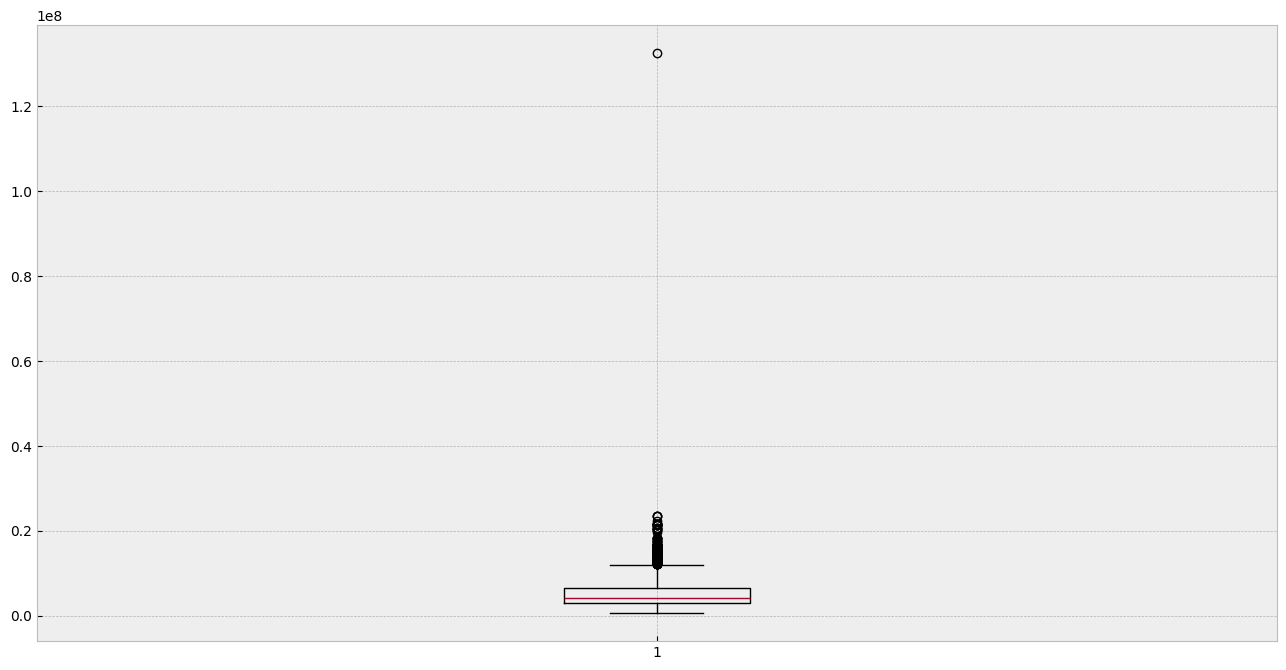

In [ ]:
#boxplot del ASIG_BASICA
fig, ax = plt.subplots(figsize=(16, 8))
ax.boxplot(x=df1['ASIG_BASICA'])

In [ ]:
#Se identifica el valor maximo de ASIG_BASICA
df1.loc[df1['ASIG_BASICA'] == df1['ASIG_BASICA'].max()]


,SEXO,NACIONALIDAD,MUNICIPIO_NACIMIENTO,DPTO_NACIMIENTO,MESES_EXPERIENCIA_PUBLICO,MESES_EXPERIENCIA_PRIVADO,MESES_EXPERIENCIA_DOCENTE,NIVEL_ACADEMICO,NIVEL_FORMACION,NOMBRE_INSTITUCION,...,ORDEN,SECTOR_ADMTIVO,NATURALEZA_JURIDICA,CLASIFICACION_ORGANICA,NIVEL_JERARQUICO_EMPLEO,TIPO_NOMBRAMIENTO,DENOMINACION_EMPLEO_ACTUAL,DEPENDENCIA_EMPLEO_ACTUAL,ASIG_BASICA,Año_VIN
TIPO_DCTO,,,,,,,,,,,,,,,,,,,,,
CEDULA DE CIUDADANIA,MASCULINO,COLOMBIA,ARMENIA,QUINDÍO,0,0,0,SIN INFORMACIÓN,SIN INFORMACIÓN,"LA REGION ADMINISTRATIVA Y DE PLANIFICACION, R...",...,TERRITORIAL,NO APLICA,REGIONES ADMINISTRATIVAS Y DE PLANIFICACIÓN - RAP,RAMA EJECUTIVA,DIRECTIVO,LIBRE NOMBRAMIENTO Y REMOCIÓN,GERENTE,Gerencia,132552158,"2,020"


Existe un outlier que corresponde a una Gerencia en el municipio de Armenia en el departamento de Quindio, en un cargo de libre nombramiento y remocion con vinculacion en el 2020 y una asignacion mensual de 132'552.158

In [ ]:
#se elimina el valor maximo de ASIG_BASICA
df1 = df1[df1['ASIG_BASICA'] != 132552158]


In [ ]:
#identificar la nueva forma de la base de datos
df1.shape

(15465, 22)

{'whiskers': [<matplotlib.lines.Line2D at 0x7bc44c372740>,
 'caps': [<matplotlib.lines.Line2D at 0x7bc44c372c80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bc44c3725c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7bc44c3731c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bc44c373460>],
 'means': []}

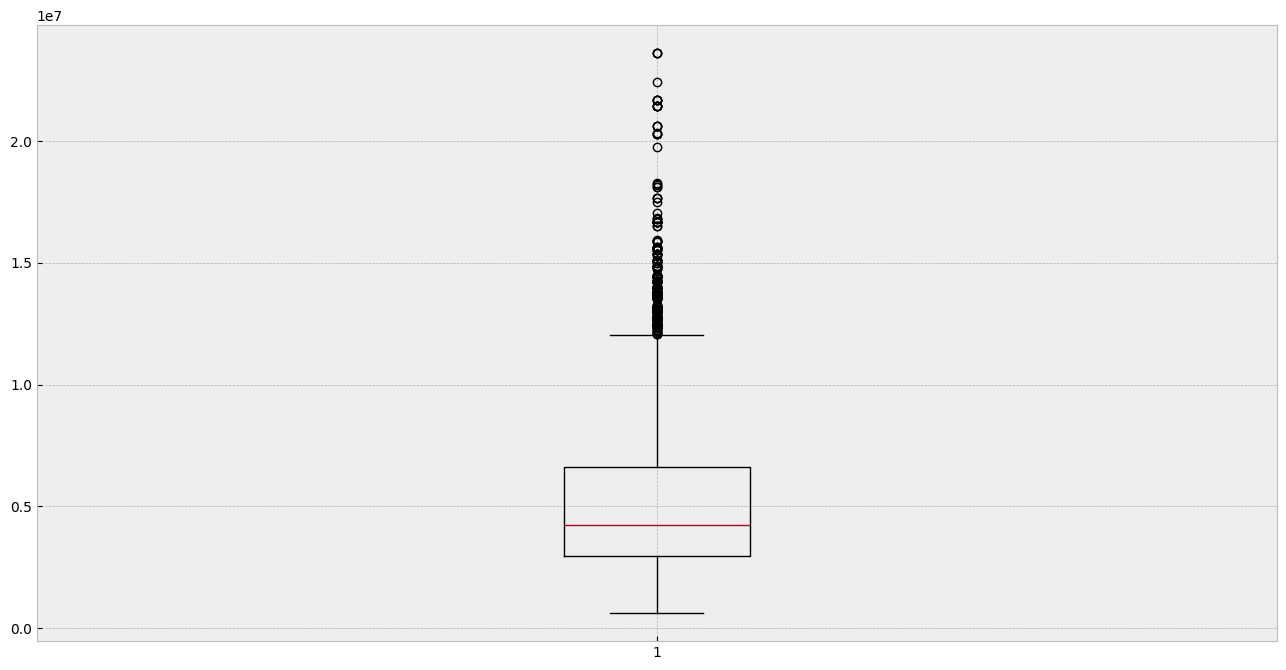

In [ ]:
#boxplot del ASIG_BASICA
fig, ax = plt.subplots(figsize=(16, 8))
ax.boxplot(x=df1['ASIG_BASICA'])

(array([8.000e+00, 4.000e+01, 1.110e+02, 2.900e+02, 4.740e+02, 9.520e+02,
        9.950e+02, 9.650e+02, 8.530e+02, 1.139e+03, 9.430e+02, 6.790e+02,
        7.840e+02, 6.060e+02, 5.180e+02, 4.280e+02, 4.540e+02, 3.870e+02,
        4.070e+02, 4.180e+02, 2.640e+02, 4.770e+02, 4.930e+02, 2.100e+02,
        2.300e+02, 2.170e+02, 2.460e+02, 1.800e+02, 1.720e+02, 1.650e+02,
        6.400e+01, 2.110e+02, 1.510e+02, 8.200e+01, 6.900e+01, 1.440e+02,
        8.900e+01, 6.500e+01, 8.000e+01, 3.000e+01, 2.900e+01, 4.800e+01,
        1.400e+01, 5.000e+01, 4.800e+01, 4.400e+01, 2.300e+01, 3.200e+01,
        1.100e+01, 8.000e+00, 6.000e+00, 1.000e+01, 6.000e+00, 0.000e+00,
        2.000e+00, 1.300e+01, 1.000e+00, 1.000e+00, 3.000e+00, 0.000e+00,
        5.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 4.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 5.000e+00,
        4.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        3.000e+00]),
 array([  618000.

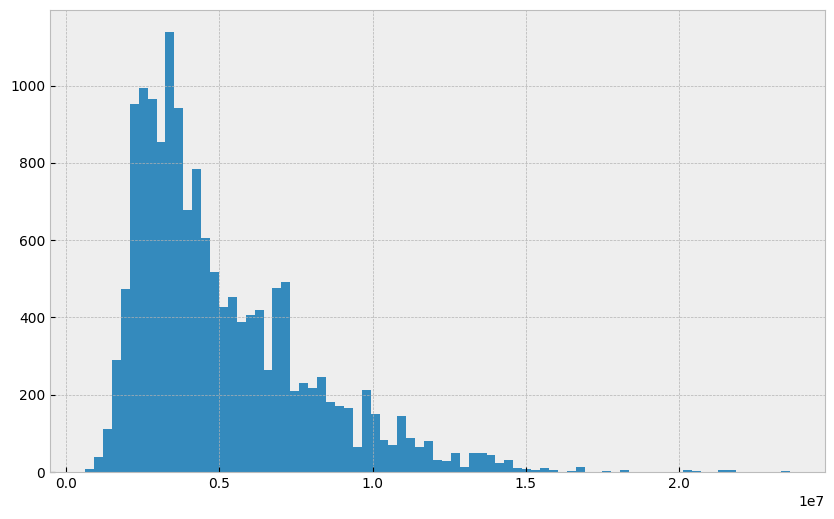

In [ ]:
#HISTOGRAMA de la ASIG_BASICA
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(x=df1['ASIG_BASICA'], bins='auto', density=False, orientation='vertical')

In [ ]:
#se identifica el valor maximo de Año_VIN
df1.loc[df1['Año_VIN'] == df1['Año_VIN'].max()]

,SEXO,NACIONALIDAD,MUNICIPIO_NACIMIENTO,DPTO_NACIMIENTO,MESES_EXPERIENCIA_PUBLICO,MESES_EXPERIENCIA_PRIVADO,MESES_EXPERIENCIA_DOCENTE,NIVEL_ACADEMICO,NIVEL_FORMACION,NOMBRE_INSTITUCION,...,ORDEN,SECTOR_ADMTIVO,NATURALEZA_JURIDICA,CLASIFICACION_ORGANICA,NIVEL_JERARQUICO_EMPLEO,TIPO_NOMBRAMIENTO,DENOMINACION_EMPLEO_ACTUAL,DEPENDENCIA_EMPLEO_ACTUAL,ASIG_BASICA,Año_VIN
TIPO_DCTO,,,,,,,,,,,,,,,,,,,,,
CEDULA DE CIUDADANIA,FEMENINO,COLOMBIA,BOGOTÁ. D.C.,BOGOTÁ. D.C.,284,0,0,POSTGRADO,ESPECIALIZACION,CONSEJO PROFESIONAL NACIONAL DE INGENIERIA,...,NACIONAL,NO APLICA,ESTABLECIMIENTO PÚBLICO,ÓRGANO AUTÓNOMO,PROFESIONAL,LIBRE NOMBRAMIENTO Y REMOCIÓN,PROFESIONAL DE GESTIÓN INSTITUCIONAL,CONSEJO PROFESIONAL NACIONAL DE INGENIERÍA - C...,6798215,"2,099"


In [ ]:
#Se elimina ese registro correspondiente al valor maximo del Año_VIN
df1 = df1[df1['Año_VIN'] != 2099]

In [ ]:
#se eliminan registros negativos '-' en 	MESES_EXPERIENCIA_PUBLICO
df1[df1['MESES_EXPERIENCIA_PUBLICO'] >= 0]

,SEXO,NACIONALIDAD,MUNICIPIO_NACIMIENTO,DPTO_NACIMIENTO,MESES_EXPERIENCIA_PUBLICO,MESES_EXPERIENCIA_PRIVADO,MESES_EXPERIENCIA_DOCENTE,NIVEL_ACADEMICO,NIVEL_FORMACION,NOMBRE_INSTITUCION,...,ORDEN,SECTOR_ADMTIVO,NATURALEZA_JURIDICA,CLASIFICACION_ORGANICA,NIVEL_JERARQUICO_EMPLEO,TIPO_NOMBRAMIENTO,DENOMINACION_EMPLEO_ACTUAL,DEPENDENCIA_EMPLEO_ACTUAL,ASIG_BASICA,Año_VIN
TIPO_DCTO,,,,,,,,,,,,,,,,,,,,,
CEDULA DE CIUDADANIA,MASCULINO,COLOMBIA,BOGOTÁ. D.C.,BOGOTÁ. D.C.,145,0,0,POSTGRADO,ESPECIALIZACION,DIRECCION DE SANIDAD DE LA POLICIA NACIONAL,...,NACIONAL,DEFENSA,ESPECIAL,RAMA EJECUTIVA,ASESOR,LIBRE NOMBRAMIENTO Y REMOCIÓN,SERVIDOR MISIONAL EN SANIDAD POLICIAL,UNIDADES DESCONCENTRADAS,5458553,"1,996"
CEDULA DE CIUDADANIA,MASCULINO,COLOMBIA,ANAPOIMA,CUNDINAMARCA,98,0,0,POSTGRADO,ESPECIALIZACION,ALCALDIA DE ANAPOIMA,...,TERRITORIAL,NO APLICA,ALCALDÍA,RAMA EJECUTIVA,DIRECTIVO,LIBRE NOMBRAMIENTO Y REMOCIÓN,DIRECTOR ADMINISTRATIVO O FINANCIERO O TÉCNICO...,SECRETARIA PARA EL DESARROLLO Y LA EQUIDAD SOCIAL,3842894,"2,016"
CEDULA DE CIUDADANIA,MASCULINO,COLOMBIA,BELTRÁN,CUNDINAMARCA,203,8,0,POSTGRADO,ESPECIALIZACION,ALCALDIA DE BELTRAN,...,TERRITORIAL,NO APLICA,ALCALDÍA,RAMA EJECUTIVA,DIRECTIVO,ELECCIÓN,ALCALDE,DESPACHO DEL ALCALDE,3691591,"2,020"
CEDULA DE CIUDADANIA,MASCULINO,COLOMBIA,BITUIMA,CUNDINAMARCA,177,0,0,BASICA SECUNDARIA,ONCE,ALCALDIA DE BITUIMA,...,TERRITORIAL,NO APLICA,ALCALDÍA,RAMA EJECUTIVA,DIRECTIVO,ELECCIÓN POPULAR,ALCALDE,DESPACHO ALCALDE MUNICIPAL,3879492,"2,020"
CEDULA DE CIUDADANIA,MASCULINO,COLOMBIA,ZIPAQUIRÁ,CUNDINAMARCA,349,0,0,POSTGRADO,MAESTRIA,DEPARTAMENTO ADMINISTRATIVO DE LA PRESIDENCIA ...,...,NACIONAL,PRESIDENCIA DE LA REPÚBLICA,DEPARTAMENTO ADMINISTRATIVO,RAMA EJECUTIVA,DIRECTIVO,ELECCIÓN,PRESIDENTE DE LA REPÚBLICA,DESPACHO DEL PRESIDENTE DE LA REPÚBLICA,7029556,"2,022"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CEDULA DE CIUDADANIA,MASCULINO,COLOMBIA,SIN INFORMACIÓN,SIN INFORMACIÓN,16,135,0,POSTGRADO,DOCTORADO,DEPARTAMENTO ADMINISTRATIVO DE LA PRESIDENCIA ...,...,NACIONAL,PRESIDENCIA DE LA REPÚBLICA,DEPARTAMENTO ADMINISTRATIVO,RAMA EJECUTIVA,ASESOR,LIBRE NOMBRAMIENTO Y REMOCIÓN,ASESOR,CONSEJERÍA PRESIDENCIAL PARA LA COMPETITIVIDAD...,9230282,"2,022"
CEDULA DE CIUDADANIA,FEMENINO,VENEZUELA,SIN INFORMACIÓN,SIN INFORMACIÓN,54,54,0,POSTGRADO,MAESTRIA,SUPERINTENDENCIA DE SERVICIOS PUBLICOS DOMICIL...,...,NACIONAL,PLANEACIÓN,SUPERINTENDENCIA CON PERSONERÍA JURÍDICA,RAMA EJECUTIVA,ASESOR,LIBRE NOMBRAMIENTO Y REMOCIÓN,ASESOR,DESPACHO DEL SUPERINTENDENTE DE SERVICIOS PÚBL...,7613882,"2,020"
CEDULA DE CIUDADANIA,FEMENINO,COLOMBIA,SIN INFORMACIÓN,SIN INFORMACIÓN,2,92,0,PREGRADO,PROFESIONAL,DEPARTAMENTO ADMINISTRATIVO DE LA PRESIDENCIA ...,...,NACIONAL,PRESIDENCIA DE LA REPÚBLICA,DEPARTAMENTO ADMINISTRATIVO,RAMA EJECUTIVA,DIRECTIVO,LIBRE NOMBRAMIENTO Y REMOCIÓN,CONSEJERO PRESIDENCIAL,CONSEJERÍA PRESIDENCIAL PARA LA NIÑEZ Y LA ADO...,3996769,"2,022"


In [ ]:
df=df1[df1['MESES_EXPERIENCIA_PUBLICO'] >= 0]
df.describe()

,MESES_EXPERIENCIA_PUBLICO,MESES_EXPERIENCIA_PRIVADO,MESES_EXPERIENCIA_DOCENTE,ASIG_BASICA,Año_VIN
count,"15,461","15,461","15,461","15,461","15,461"
mean,143,45,9,"5,057,771","2,017"
std,154,128,40,"2,834,481",6
min,0,0,0,"618,000","1,958"
25%,42,0,0,"2,965,622","2,016"
50%,106,10,0,"4,249,624","2,020"
75%,194,58,0,"6,613,000","2,020"
max,"2,720","12,189",912,"23,613,305","2,022"


In [ ]:
df.shape


(15461, 22)

Se han eliminado duplicados y se ha verificado que la base de datos se encuetre completamente limpia y no haya valores nulos, asi como que las variables se encuentren correctamente definidas. Una vez transformadas las variables la base de datos queda comprendida por 15466 filas y 24 columnas.


Se plantean 2 hipotesis:
1. Los departamentos con mayor cantidad de funcionarios son aquellos mas grandes y por ende la Capital (Bogota) debe tener mayor representatividad.
2. Los salarios de los funcionarios no tienen diferencias por sexo y son proporcionales a los años de experiencia en el sector publico.

In [ ]:
 # Seleccionar solo las columnas numéricas del DataFrame
df_numericas = df.select_dtypes(include=[np.number])
# Calcular la matriz de correlación de Spearman debido a la variabilidad
correlacion_spearman = df_numericas.corr(method= 'spearman')
 # Matriz de correlación
figCorrelacion = px.imshow(correlacion_spearman , text_auto=True, aspect="auto", title='Matriz de Correlación')
figCorrelacion.show()

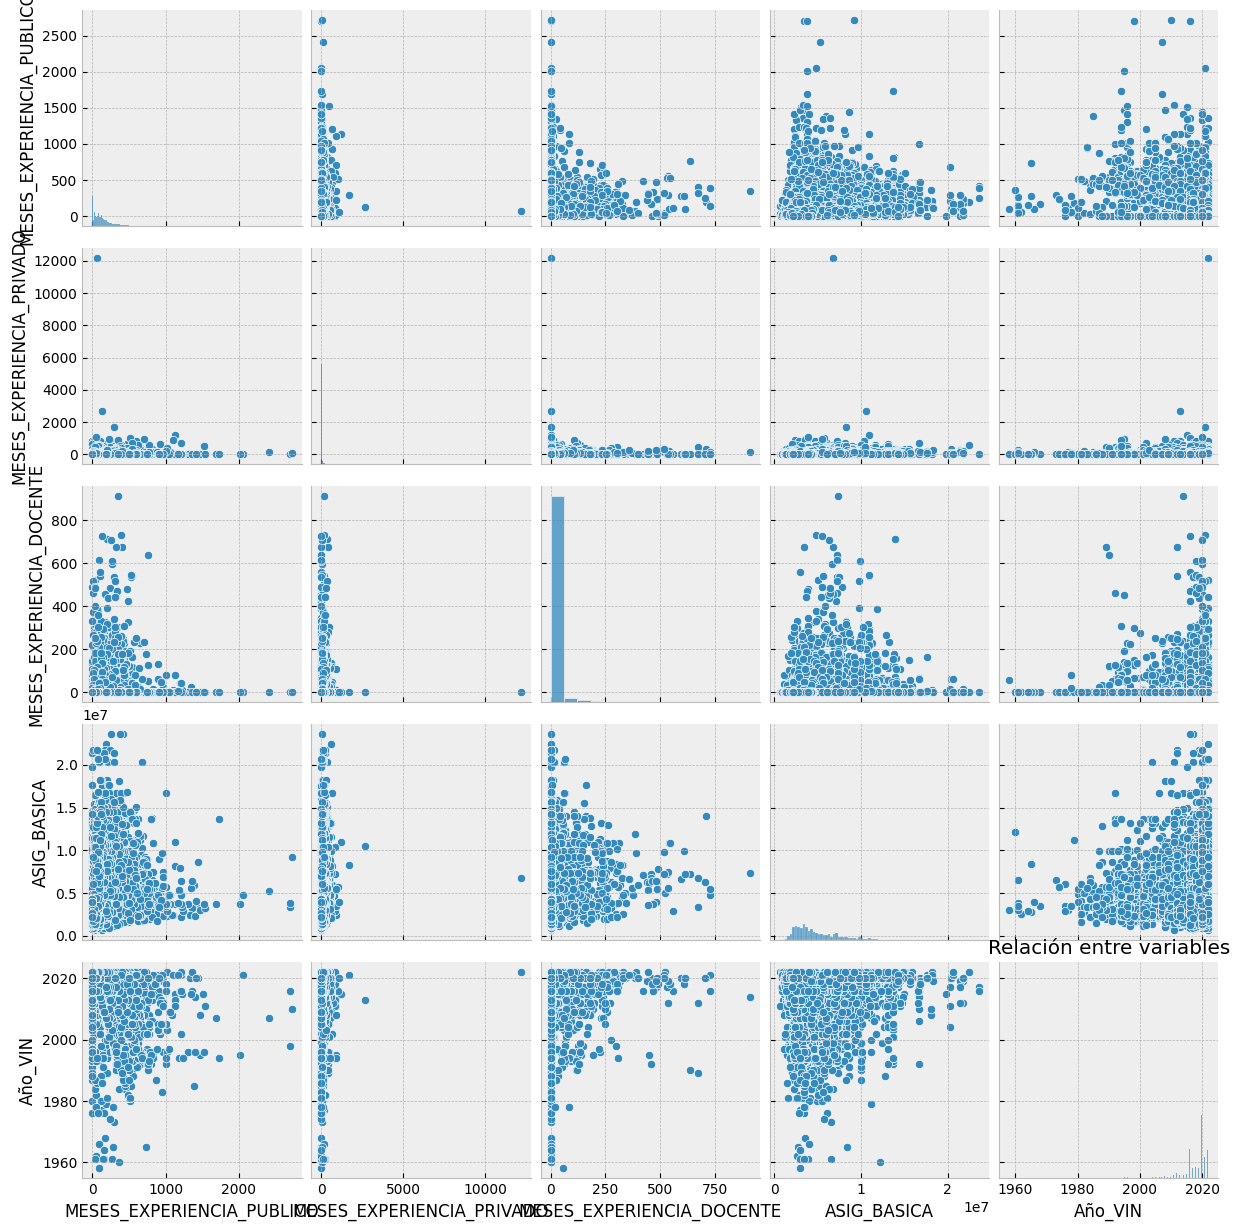

In [ ]:
# Gráfico de dispersión (scatter plot)
sns.pairplot(df)
plt.title("Relación entre variables")
plt.show()

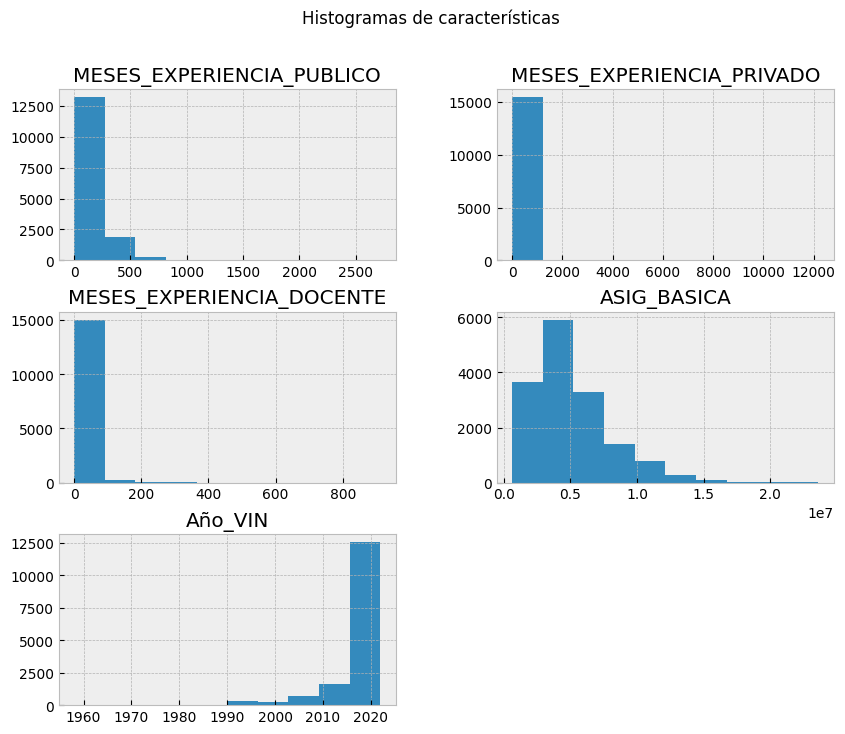

In [ ]:
# Histograma de características
df.hist(figsize=(10, 8))
plt.suptitle("Histogramas de características ")
plt.show()

En el anterior diagrama de correlacion no se observan relaciones fuertes entre varibales numericas, se realiza la transformacion de categorias para realizar un nuevo diagrama

In [ ]:
# Codificar las variables 'SEXO', 'NACIONALIDAD','MUNICIPIO_NACIMIENTO', 'DPTO_NACIMIENTO',
#'NIVEL_ACADEMICO', 'NIVEL_FORMACION','NOMBRE_INSTITUCION', 'MUNICIPIO_INSTITUCION', 'DPTO_INSTITUCION',
#'ORDEN', 'SECTOR_ADMTIVO', 'NATURALEZA_JURIDICA','CLASIFICACION_ORGANICA', 'NIVEL_JERARQUICO_EMPLEO','TIPO_NOMBRAMIENTO', 'DENOMINACION_EMPLEO_ACTUAL',
#'DEPENDENCIA_EMPLEO_ACTUAL' con LabelEncoder
label_encoder = LabelEncoder()#nos traemos el algoritmo

In [ ]:
#se cre una copia para tener la base sin codificar y posteriormente realizar graficos
df_c=df1.copy()

In [ ]:
df['SEXO'] = label_encoder.fit_transform(df['SEXO'])#generamos una nueva col que va a la refleje esta transformacion, sobre que columna queremos que haga esta transformacion y fit_transform
df['NACIONALIDAD'] = label_encoder.fit_transform(df['NACIONALIDAD'])
df['MUNICIPIO_NACIMIENTO'] = label_encoder.fit_transform(df['MUNICIPIO_NACIMIENTO'])
df['DPTO_NACIMIENTO'] = label_encoder.fit_transform(df['DPTO_NACIMIENTO'])
df['NIVEL_ACADEMICO'] = label_encoder.fit_transform(df['NIVEL_ACADEMICO'])
df['NIVEL_FORMACION'] = label_encoder.fit_transform(df['NIVEL_FORMACION'])
df['NOMBRE_INSTITUCION'] = label_encoder.fit_transform(df['NOMBRE_INSTITUCION'])
df['MUNICIPIO_INSTITUCION'] = label_encoder.fit_transform(df['MUNICIPIO_INSTITUCION'])
df['DPTO_INSTITUCION'] = label_encoder.fit_transform(df['DPTO_INSTITUCION'])
df['ORDEN'] = label_encoder.fit_transform(df['ORDEN'])
df['SECTOR_ADMTIVO'] = label_encoder.fit_transform(df['SECTOR_ADMTIVO'])
df['NATURALEZA_JURIDICA'] = label_encoder.fit_transform(df['NATURALEZA_JURIDICA'])
df['CLASIFICACION_ORGANICA'] = label_encoder.fit_transform(df['CLASIFICACION_ORGANICA'])
df['NIVEL_JERARQUICO_EMPLEO'] = label_encoder.fit_transform(df['NIVEL_JERARQUICO_EMPLEO'])
df['TIPO_NOMBRAMIENTO'] = label_encoder.fit_transform(df['TIPO_NOMBRAMIENTO'])
df['DENOMINACION_EMPLEO_ACTUAL'] = label_encoder.fit_transform(df['DENOMINACION_EMPLEO_ACTUAL'])
df['DEPENDENCIA_EMPLEO_ACTUAL'] = label_encoder.fit_transform(df['DEPENDENCIA_EMPLEO_ACTUAL'])


<ipython-input-42-a0fbb552b3f7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-42-a0fbb552b3f7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-42-a0fbb552b3f7>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-42-a0fbb55

In [ ]:
correlacion = df.corr(method= 'spearman')
 # Matriz de correlación
figCorrelacion2 = px.imshow(correlacion, text_auto=True, aspect="auto", title='Matriz de Correlación')
figCorrelacion2.show()

In [ ]:
#se eliminan columnas para evitar colinealidad 'MUNICIPIO_NACIMIENTO', 'NIVEL_ACADEMICO', 'NACIONALIDAD', 'MUNICIPIO_INSTITUCION'
df2 = df.drop(columns=['MUNICIPIO_NACIMIENTO', 'NIVEL_ACADEMICO', 'NACIONALIDAD', 'MUNICIPIO_INSTITUCION'])

In [ ]:
correlacion2 = df2.corr(method= 'spearman')
figCorrelacion3 = px.imshow(correlacion2, text_auto=True, aspect="auto", title='Matriz de Correlación')
figCorrelacion3.show()

In [ ]:
#se eliminan las columnas 'MUNICIPIO_NACIMIENTO', 'NIVEL_ACADEMICO', 'NACIONALIDAD', 'MUNICIPIO_INSTITUCION' tambien de df_c
df_c = df_c.drop(columns=['MUNICIPIO_NACIMIENTO', 'NIVEL_ACADEMICO', 'NACIONALIDAD', 'MUNICIPIO_INSTITUCION'])

In [ ]:
conteo_dpto = df_c['DPTO_INSTITUCION'].value_counts().sort_index()
conteo_dpto


,count
DPTO_INSTITUCION,
AMAZONAS,25
ANTIOQUIA,1429
ARAUCA,126
ARCHIPIÉLAGO DE SAN ANDRÉS. PROVIDENCIA Y SANTA CATALINA,42
ATLÁNTICO,440
BOGOTÁ. D.C.,5110
BOLÍVAR,414
BOYACÁ,646
CALDAS,320


In [ ]:
cant_dpto = sum(conteo_dpto)

Ya que hay una gran cantididad de departanmentos se define y se grafican el top 5.

In [ ]:
dpto_top5 = df_c['DPTO_INSTITUCION'].value_counts().sort_values(ascending=0).head(5)
dpto_top5

,count
DPTO_INSTITUCION,
BOGOTÁ. D.C.,5110
ANTIOQUIA,1429
CUNDINAMARCA,875
VALLE DEL CAUCA,816
SANTANDER,717


In [ ]:
dpto= df_c.DPTO_INSTITUCION

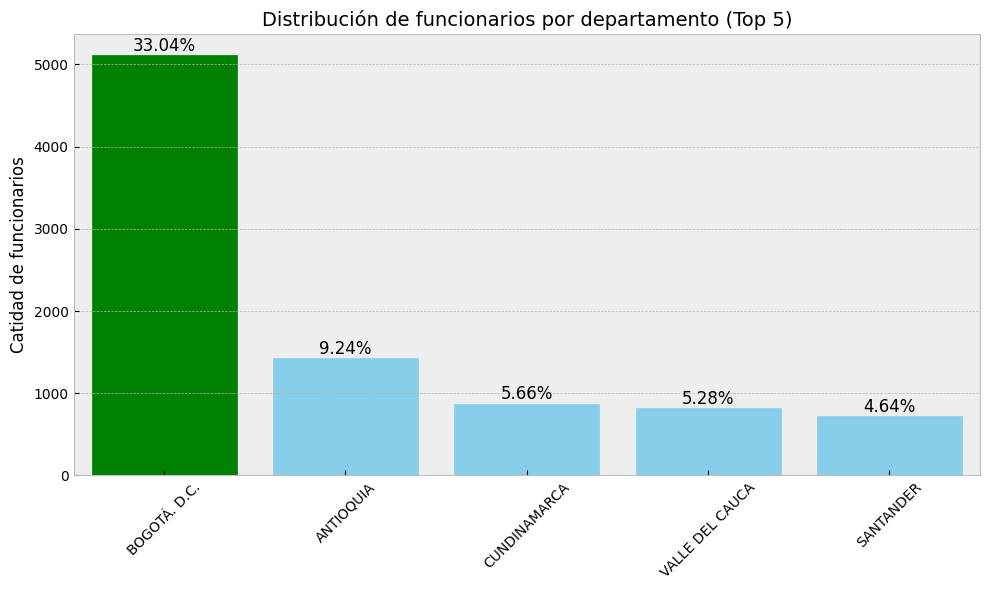

In [ ]:
# Crear lienzo y Gráfico
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=dpto_top5.index, y=dpto_top5.values)

# Configuración de cada barra
colores = ['green' if dpto == 'BOGOTÁ. D.C.' else 'skyblue' for dpto in dpto_top5.index]
for i, bar in enumerate(bars.patches):
  bar.set_color(colores[i]) # Asignar colores manualmente a cada barra

  # Calcular el porcentaje para cada barra
  porcentaje = (dpto_top5.values[i] / cant_dpto) * 100

  # Colocar el texto de porcentaje justo encima de cada barra
  bars.text(
      bar.get_x() + bar.get_width() / 2,  # Posición en X
      bar.get_height() + 5,               # Posición en Y (ligeramente encima de la barra)
      f'{porcentaje:.2f}%',               # Texto con formato de porcentaje
      ha='center', va='bottom',           # Alineación del texto
      fontsize=12, color='black'          # Tamaño y color del texto
  )

# Estética
plt.title('Distribución de funcionarios por departamento (Top 5)', fontsize=14)
plt.xlabel('')
plt.ylabel('Catidad de funcionarios', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Se confirma la hipotesis 1: los departamentos principales tienen el mayor numero de funcionaros. Aunque es relevante que la capital tenga mas de 3 veces el numero de funcionarios que la totalidad del departamento de Antioquia y  9 veces el valle del Cauca.

Se continua con la exploracion de la variable sexo:

In [ ]:
conteo_sexo = df_c['SEXO'].value_counts().sort_index()
conteo_sexo.index

Index(['FEMENINO', 'MASCULINO'], dtype='object', name='SEXO')

Text(0.5, 1.0, 'Piechart de distribucion por sexo')

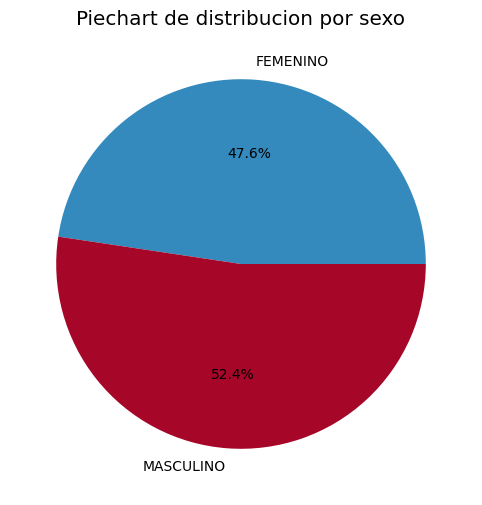

In [ ]:
fig,ax = plt.subplots(figsize =(10, 6))
ax.pie(conteo_sexo, labels = conteo_sexo.index,autopct='%1.1f%%')
ax.set_title('Piechart de distribucion por sexo')

En la distribución general no se observan diferencias en la distribución por sexo.

Se continua con la exploracion de la variable salario (ASIG_BASICA)

In [ ]:
df_c.ASIG_BASICA.describe()

,ASIG_BASICA
count,"15,464"
mean,"5,057,662"
std,"2,834,302"
min,"618,000"
25%,"2,965,612"
50%,"4,249,624"
75%,"6,613,000"
max,"23,613,305"


Se intuye una distribución asimetrica ya que hay un rango muy amplio entre el valor minimo y maximo. Adicionalmente la media y la mediana no se encuentran cercanas y la desviación estandar es bastante amplia.

Se define la variable salario y se grafica:

In [ ]:
salario= df_c['ASIG_BASICA'].astype (int)

Text(0.5, 1.0, 'Histograma de Salario')

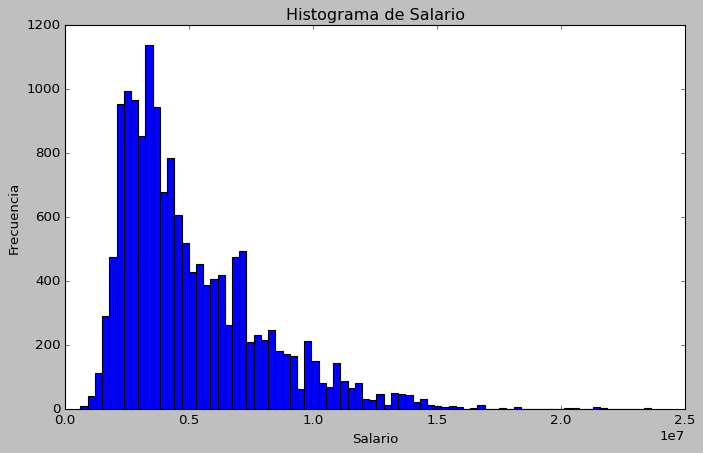

In [ ]:
from enum import auto
mpl.style.use('classic')
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(x=salario , bins= 'auto', density=False, orientation='vertical',)
ax.set_xlabel('Salario')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de Salario')

El anerior histograma confirma la distribución asimetrica de los salarios con una mayor proporcion de bajos salarios.

Se realiza un diagrama de cajas para explorar valores extremos:

Efectivamente se comprueba que la mayor proporcion de salarios son bajos con algunos valores extremos en los salarios altos. Existen los valores extremos que valdría la pena explora en un futuro como casos aislados.

Se realiza la expliracion de salarios discriminados por sexo:

<Axes: xlabel='ASIG_BASICA', ylabel='Count'>

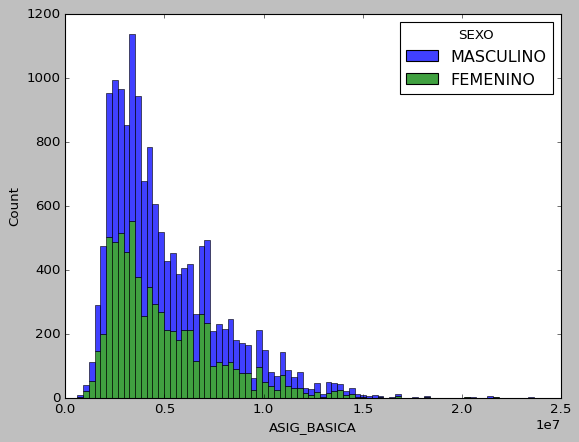

In [ ]:
sns.histplot(data=df_c, x= salario, hue="SEXO", multiple='stack')

Se observa que para ambos sexos la distribución del salario es asimetrica. Se observan mayor proporcion de hombres con salarios bajos.

Se explora el salario por sexo en relación con los meses de experiencia en el sector publico y en el orden (nacional o territorial)

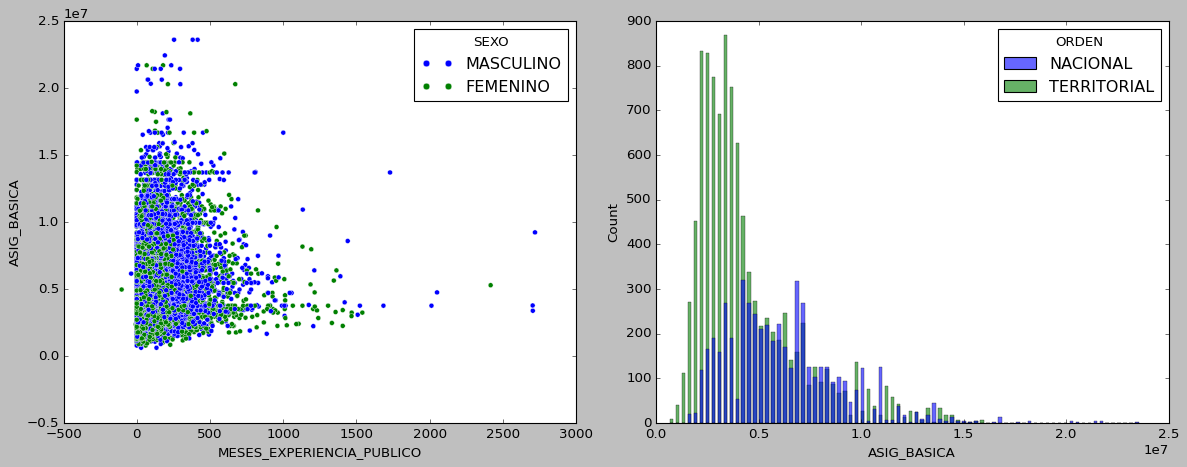

In [ ]:
# Axes level
import matplotlib.pyplot as plt


f, axs = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw=dict(width_ratios=[4, 4]))
sns.scatterplot(data=df_c, x= "MESES_EXPERIENCIA_PUBLICO", y="ASIG_BASICA", hue="SEXO", ax=axs[0])
sns.histplot(data=df_c, x= "ASIG_BASICA", hue= "ORDEN", shrink=.6, alpha=.6, ax=axs[1])
f.tight_layout()

Se observan que los salarios mas bajos corresponden a una menor cantidad de experiencia en el sector publico. Sin embargo en el comportamiento de datos atipicos se observa un valor extremo de un hombre con un salario muy alto y poca experiencia, asi como una mujer con un salaio muy bajo y una amplia experiencia.

En el segundo grafico se observa que hay una mayor proporcion de salarios bajos en el orden territorial, mientras en el orden nacional suelen ser mas altos. Para ambos casos la distribucion es asimetrica.

Finalmente se exploran los salarios por genero a travez de un diagrama de cajas y se confirma una distribucion similar entre hombres y mujeres, siendo asimetrica en ambos casos y con valores extremos en los salarios altos.

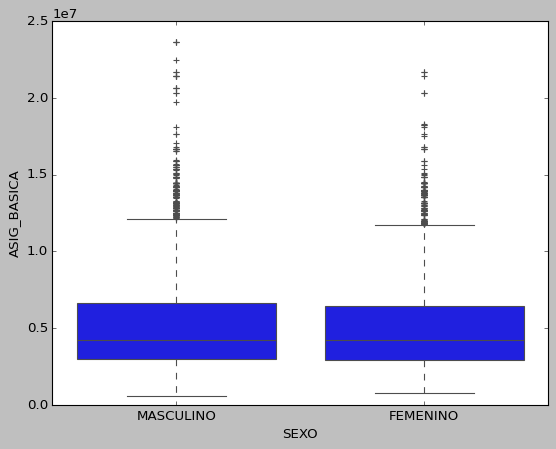

In [ ]:
ax = sns.boxplot(x="SEXO", y="ASIG_BASICA", data=df_c)

##Finalmente se contrastan las hipotesis inicialmente planteadas:

### 1.Los departamentos con mayor cantidad de funcionarios son aquellos mas grandes y por ende la Capital (Bogota) debe tener mayor representatividad.

Esta hipotesis se comprobó, sin embargo no se esperaba una diferencia tan amplia.

###Los salarios de los funcionarios no tienen diferencias por sexo y son proporcionales a los años de experiencia en el sector publico.

Efectivamente no se observaron diferencias por sexo, se demostros la asimetria en la distribución de los salarios. Sin embargo, la experiencia en el sector publico parece no tener relacion con la asignacion salarial, ya que se observan salarios altos con poca experiencia, asi como salarios bajos con mucha experiencia.

Modelo

In [ ]:
# Preparación de datos para el modelo
X = df2.drop('ASIG_BASICA', axis=1)
y = df2['ASIG_BASICA']

In [ ]:
# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear un modelo de Regresión Lineal
linreg = LinearRegression()

In [ ]:
# Aplicar `RFE` para seleccionar características
selector = RFE(linreg, n_features_to_select=6)
selector = selector.fit(X_train, y_train)

# Características seleccionadas
print("Selected Features:", X.columns[selector.support_])#nombre de las variables relevantes
#solo escojo las variables que me arroja el algoritmo
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

Selected Features: Index(['SEXO', 'NIVEL_FORMACION', 'ORDEN', 'SECTOR_ADMTIVO',
       'CLASIFICACION_ORGANICA', 'NIVEL_JERARQUICO_EMPLEO'],
      dtype='object')


In [ ]:
# Entrenamiento del modelo con características seleccionadas
linreg.fit(X_train_selected, y_train)

# Predicción y evaluación
y_pred = linreg.predict(X_test_selected)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 6243990943882.252
R2 Score: 0.2512619909598438


In [ ]:
#crear copia de df2
df3=df2.copy()

In [ ]:
#clasificar ASIG_BASICA en quantiles
df3['ASIG_bin'] = pd.qcut(df3['ASIG_BASICA'], q=4, labels=False)
#insertar labels
df3['ASIG_bin'] = df2['ASIG_bin'].replace({0: 'Bajo', 1: 'Medio', 2: 'Alto', 3: 'Muy Alto'})
df3





,SEXO,DPTO_NACIMIENTO,MESES_EXPERIENCIA_PUBLICO,MESES_EXPERIENCIA_PRIVADO,MESES_EXPERIENCIA_DOCENTE,NIVEL_FORMACION,NOMBRE_INSTITUCION,DPTO_INSTITUCION,ORDEN,SECTOR_ADMTIVO,NATURALEZA_JURIDICA,CLASIFICACION_ORGANICA,NIVEL_JERARQUICO_EMPLEO,TIPO_NOMBRAMIENTO,DENOMINACION_EMPLEO_ACTUAL,DEPENDENCIA_EMPLEO_ACTUAL,ASIG_BASICA,Año_VIN,ASIG_bin,asig_encoded
TIPO_DCTO,,,,,,,,,,,,,,,,,,,,
CEDULA DE CIUDADANIA,1,5,145,0,0,1,1344,5,0,5,18,3,0,7,239,3903,5458553,"1,996",Alto,0
CEDULA DE CIUDADANIA,1,14,98,0,0,1,57,14,1,15,1,3,1,7,54,2702,3842894,"2,016",Medio,2
CEDULA DE CIUDADANIA,1,14,203,8,0,1,117,14,1,15,1,3,1,2,3,315,3691591,"2,020",Medio,2
CEDULA DE CIUDADANIA,1,14,177,0,0,3,123,14,1,15,1,3,1,3,3,272,3879492,"2,020",Medio,2
CEDULA DE CIUDADANIA,1,14,349,0,0,2,1337,5,0,17,12,3,1,2,178,353,7029556,"2,022",Muy Alto,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CEDULA DE CIUDADANIA,1,28,16,135,0,0,1337,5,0,17,12,3,0,7,10,131,9230282,"2,022",Muy Alto,3
CEDULA DE CIUDADANIA,0,28,54,54,0,2,2643,5,0,16,36,3,0,7,10,385,7613882,"2,020",Muy Alto,3
CEDULA DE CIUDADANIA,0,28,2,92,0,5,1337,5,0,17,12,3,1,7,33,134,3996769,"2,022",Medio,2


In [ ]:
#conteno segun ASIG_bin
conteo_asig = df3['ASIG_bin'].value_counts().sort_index()
conteo_asig


,count
ASIG_bin,
Alto,3763
Bajo,3869
Medio,3966
Muy Alto,3863


In [ ]:
# Codificar la variable objetivo 'species' con LabelEncoder
label_encoder = LabelEncoder()#nos traemos el algoritmo
df3['asig_encoded'] = label_encoder.fit_transform(df3['ASIG_bin'])#generamos una nueva col que va a la refleje esta transformacion, sobre que columna queremos que haga esta transformacion y fit_transform

# Verificar la codificación
print(label_encoder.classes_)  # Muestra las especies y su valor codificado
print(df3[['ASIG_bin', 'asig_encoded']].head())

['Alto' 'Bajo' 'Medio' 'Muy Alto']
                      ASIG_bin  asig_encoded
TIPO_DCTO                                   
CEDULA DE CIUDADANIA      Alto             0
CEDULA DE CIUDADANIA     Medio             2
CEDULA DE CIUDADANIA     Medio             2
CEDULA DE CIUDADANIA     Medio             2
CEDULA DE CIUDADANIA  Muy Alto             3


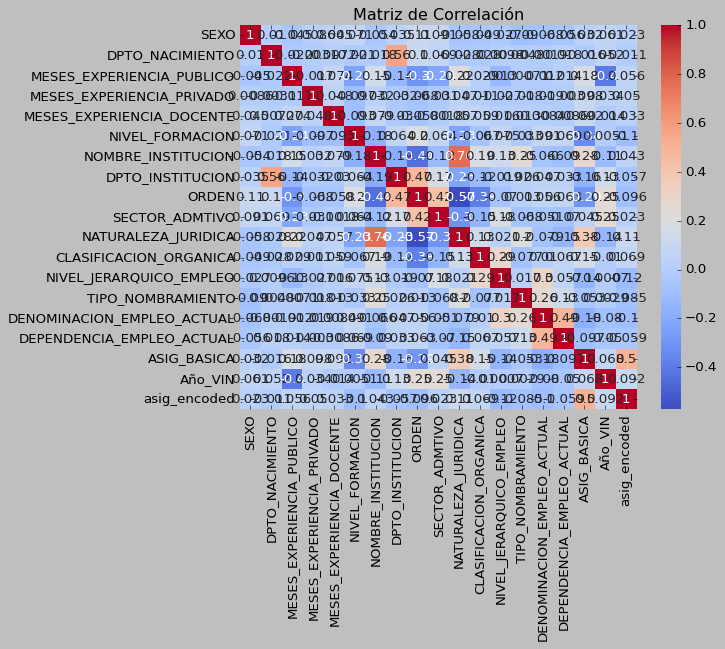

In [ ]:
#se elimina 'ASIG_BASICA' y 'ASIG_bin'

modelo2= df3.drop('ASIG_BASICA', axis=1)
modelo2= df3.drop('ASIG_bin', axis=1)

correlation_matrix = modelo2.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
# Preparación de datos para el modelo
X = modelo2.drop('asig_encoded', axis=1)
y = modelo2['asig_encoded']

In [ ]:
X

,SEXO,DPTO_NACIMIENTO,MESES_EXPERIENCIA_PUBLICO,MESES_EXPERIENCIA_PRIVADO,MESES_EXPERIENCIA_DOCENTE,NIVEL_FORMACION,NOMBRE_INSTITUCION,DPTO_INSTITUCION,ORDEN,SECTOR_ADMTIVO,NATURALEZA_JURIDICA,CLASIFICACION_ORGANICA,NIVEL_JERARQUICO_EMPLEO,TIPO_NOMBRAMIENTO,DENOMINACION_EMPLEO_ACTUAL,DEPENDENCIA_EMPLEO_ACTUAL,ASIG_BASICA,Año_VIN
TIPO_DCTO,,,,,,,,,,,,,,,,,,
CEDULA DE CIUDADANIA,1,5,145,0,0,1,1344,5,0,5,18,3,0,7,239,3903,5458553,"1,996"
CEDULA DE CIUDADANIA,1,14,98,0,0,1,57,14,1,15,1,3,1,7,54,2702,3842894,"2,016"
CEDULA DE CIUDADANIA,1,14,203,8,0,1,117,14,1,15,1,3,1,2,3,315,3691591,"2,020"
CEDULA DE CIUDADANIA,1,14,177,0,0,3,123,14,1,15,1,3,1,3,3,272,3879492,"2,020"
CEDULA DE CIUDADANIA,1,14,349,0,0,2,1337,5,0,17,12,3,1,2,178,353,7029556,"2,022"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CEDULA DE CIUDADANIA,1,28,16,135,0,0,1337,5,0,17,12,3,0,7,10,131,9230282,"2,022"
CEDULA DE CIUDADANIA,0,28,54,54,0,2,2643,5,0,16,36,3,0,7,10,385,7613882,"2,020"
CEDULA DE CIUDADANIA,0,28,2,92,0,5,1337,5,0,17,12,3,1,7,33,134,3996769,"2,022"


In [ ]:
# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:

# Crear un modelo de Regresión Logística
logreg = LogisticRegression(max_iter=200)#arbol de decision

In [ ]:
# Aplicar `RFE` para seleccionar características
selector = RFE(logreg, n_features_to_select=5)
selector = selector.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

In [ ]:
# Características seleccionadas
print("Selected Features:", X.columns[selector.support_])
X_train_selected = selector.transform(X_train)
X_train_selected = selector.transform(X_test)

Selected Features: Index(['NIVEL_FORMACION', 'ORDEN', 'SECTOR_ADMTIVO', 'CLASIFICACION_ORGANICA',
       'NIVEL_JERARQUICO_EMPLEO'],
      dtype='object')


In [ ]:
X.columns

Index(['SEXO', 'DPTO_NACIMIENTO', 'MESES_EXPERIENCIA_PUBLICO',
       'MESES_EXPERIENCIA_PRIVADO', 'MESES_EXPERIENCIA_DOCENTE',
       'NIVEL_FORMACION', 'NOMBRE_INSTITUCION', 'DPTO_INSTITUCION', 'ORDEN',
       'SECTOR_ADMTIVO', 'NATURALEZA_JURIDICA', 'CLASIFICACION_ORGANICA',
       'NIVEL_JERARQUICO_EMPLEO', 'TIPO_NOMBRAMIENTO',
       'DENOMINACION_EMPLEO_ACTUAL', 'DEPENDENCIA_EMPLEO_ACTUAL',
       'ASIG_BASICA', 'Año_VIN'],
      dtype='object')

In [ ]:
# Entrenamiento del modelo con características seleccionadas
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=200)

In [ ]:
# Predicción y evaluación
y_pred = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9230437594309119
Confusion Matrix:
 [[ 979    0   71   79]
 [   0 1098   38    0]
 [  67   28 1098    0]
 [  74    0    0 1107]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      1129
           1       0.98      0.97      0.97      1136
           2       0.91      0.92      0.92      1193
           3       0.93      0.94      0.94      1181

    accuracy                           0.92      4639
   macro avg       0.92      0.92      0.92      4639
weighted avg       0.92      0.92      0.92      4639

